In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Za učitavanje FMNIST

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

### Učitavanje podataka

Učitamo podatke za naš problem

In [3]:
data = np.load('mnist.npz')

image_train = data['x_train']/255
image_test = data['x_test']/255
label_train = data['y_train']
label_test = data['y_test']

#Fashion dataset
fashion = 0
if(fashion == 1):
    image_train, label_train = load_mnist('data/fashion', kind='train')
    image_test, label_test = load_mnist('data/fashion', kind='t10k')
    image_train = image_train/255
    image_test = image_test/255

### Postavljanje parametara

Postavimo parametre (da lakše pratimo i mijenjamo varijable, $m$ je problematičan zbog veličine)

In [4]:
d = 28**2
d_y = 10
m = 1000
alfa = 0.59

### Postavljanje podataka

Definiramo matrice $X$ i $Y$ koje sadrže podatke i labele

In [5]:
X = np.zeros((d, m))

for i in range(m):
    im = image_train[i]
    X[:,i] = im.flatten('F').transpose()
    
# im = np.reshape(X[:,10], (28,28), order = 'F') Za prebacit nazad u sliku.

Y = np.zeros((d_y, m))
for i in range(m):
    vrijednost = label_train[i]
    Y[vrijednost, i] = 1

### Računanje matrice $G$

In [6]:
gram = np.ones((m,m))

for i in range(d):
    theta = np.zeros((2,m))
    redak = alfa*X[i,:]
    theta[0,:] = np.cos(redak)
    theta[1,:] = np.sin(redak)
    
    gram *= (theta.T.dot(theta))

### Računanje $Z$

Rješavamo najmanje kvadrate da bi dobili matricu $Z$

Funkcija $\texttt{np.linalg.lstsq}(A,b)$ rješava sustav $AX = b$ pa za rješenje sustava $ZG = Y$ u varijabli $Z$ transponiramo cijeli sustav i dobijemo $G^TZ^T = Y^T$.

In [7]:
Z, _, _, _ = np.linalg.lstsq(gram, np.transpose(Y))
Z = np.transpose(Z)

<ipython-input-7-294b1156d4b9>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Z, _, _, _ = np.linalg.lstsq(gram, np.transpose(Y))


### Funkcija za klasifikaciju

In [8]:
def klasifikator2(vektor):
    
    K = np.ones((m,1))
    
    for i in range(d):
        theta = np.zeros((2,m))
        redak = alfa*X[i,:]
        theta[0,:] = np.cos(redak)
        theta[1,:] = np.sin(redak)
        
        K *= (theta.T.dot([[np.cos(alfa*vektor[i])], [np.sin(alfa*vektor[i])]]))
  
    rez = (Z @ K)

    return np.argmax((rez))

In [9]:
duljina = 200

X_test = np.zeros((d,duljina))

for i in range(duljina):
    im = image_test[i]
    X_test[:,i] = im.flatten('F').transpose()

prediction = np.zeros(duljina)
prediction_matrix = np.zeros((10,10))
for i in range(duljina):
    prediction[i] = klasifikator2(X_test[:,i])
    prediction_matrix[int(prediction[i]), label_test[i]] += 1

print("Training size:", m)
print("Test size:", duljina)
print("Preciznost:",np.sum(prediction == label_test[0:duljina])/duljina)

Training size: 1000
Test size: 200
Preciznost: 0.875


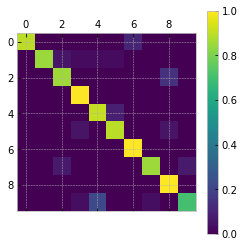

In [10]:
for i in range(10):
    prediction_matrix[i,:] = prediction_matrix[i,:]/np.sum(prediction_matrix[i,:])

plt.style.use('bmh')
plt.matshow(prediction_matrix)
plt.colorbar()
plt.show()